<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
   
                                          
                                          
                                          
                                          
                                          
#                               Tree Decision Model in Predicting Obesity Risk




##                                                        Gladys Murage

##                              College of Business, Engineering, and  Technology, National University

##                                         DDS8555 v1: PREDICTIVE ANALYSIS(3602869492)

##                                                        Dr MOHAMED NABEEL

##                                                            April 15, 2025


<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>

Validation Accuracy: 0.8369

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       524
           1       0.84      0.65      0.74       626
           2       0.82      0.78      0.80       543
           3       0.98      0.94      0.96       657
           4       1.00      1.00      1.00       804
           5       0.56      0.81      0.66       484
           6       0.72      0.68      0.70       514

    accuracy                           0.84      4152
   macro avg       0.83      0.83      0.82      4152
weighted avg       0.85      0.84      0.84      4152



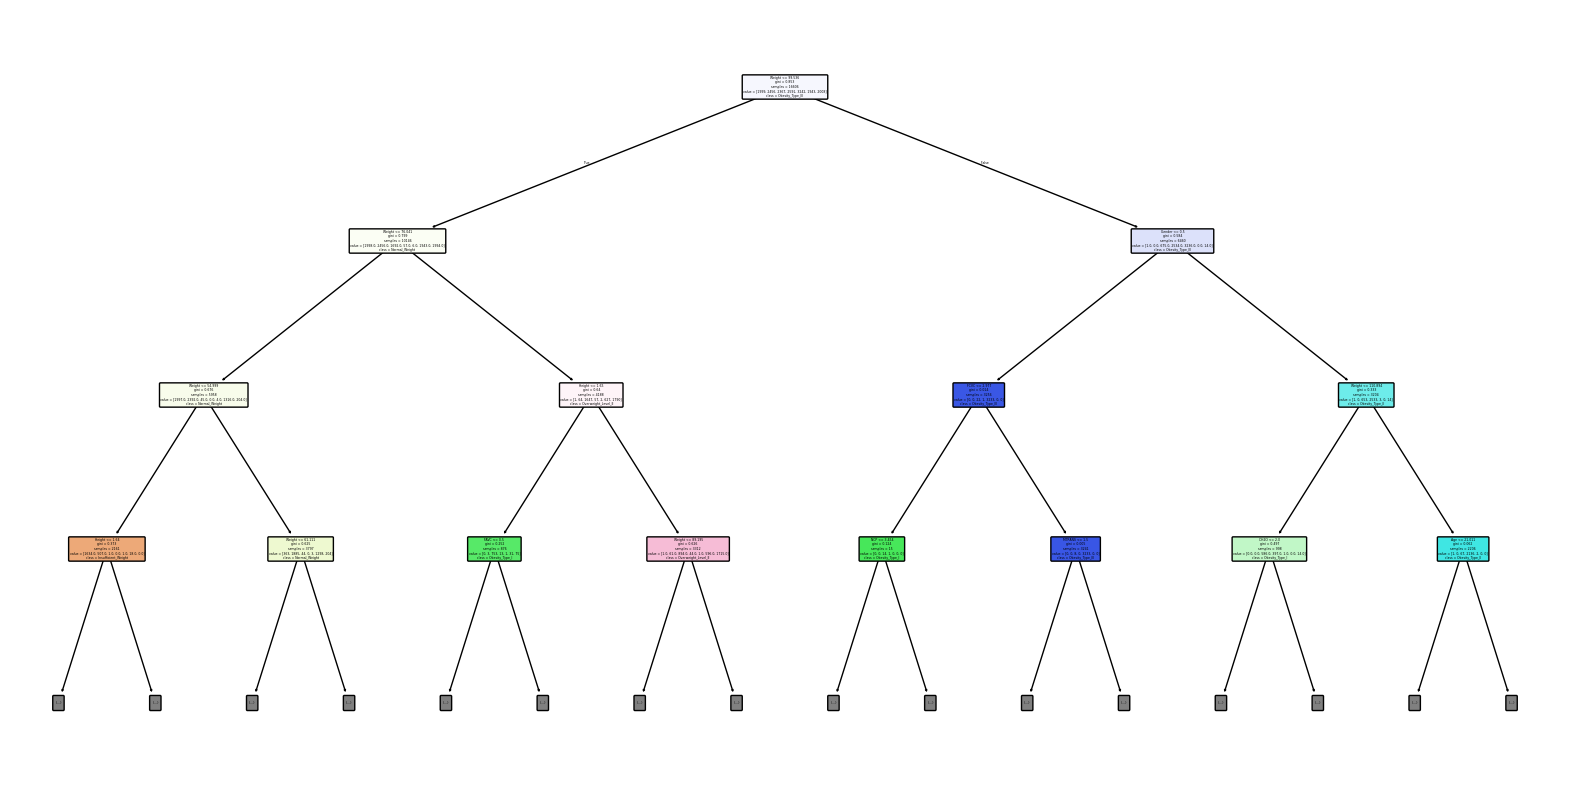

  - Replaced with 'Frequently'

Test predictions saved to 'decision_tree_submission.csv'


In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

# Load data
train = pd.read_csv('Otrain.csv')
test = pd.read_csv('Otest.csv')
sample_sub = pd.read_csv('Osample_submission.csv')

# Separate features and target
X = train.drop('NObeyesdad', axis=1)
y = train['NObeyesdad']

# Preprocessing: Convert categorical variables to numerical
# Initialize label encoder
# Replace the problematic section with this more robust approach
# Create label encoders for categorical columns
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Also encode the target variable if it's categorical
if y.dtype == 'object':
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
dt_classifier = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    random_state=42
)
dt_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = dt_classifier.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Visualize the decision tree (first few levels)
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_classifier, 
               feature_names=X.columns, 
               class_names=le_target.classes_ if 'le_target' in locals() else None,
               filled=True, 
               rounded=True,
               max_depth=3)
plt.show()

# Prepare test set predictions with robust handling of unseen categories
if not test.empty:
    # Create a copy of test data to avoid modifying the original
    test_processed = test.copy()
    
    # Apply preprocessing to test data with handling for unseen categories
    for column in test_processed.select_dtypes(include=['object']).columns:
        if column in label_encoders:
            # Handle unseen categories by replacing them with a default value
            # Get all unique values in this column from the test set
            test_unique_values = test_processed[column].unique()
            
            # Find values that weren't in the training set
            unseen_values = [val for val in test_unique_values 
                            if val not in label_encoders[column].classes_]
            
            if unseen_values:
                print(f"Warning: Column '{column}' contains unseen values: {unseen_values}")
                # Replace unseen values with the most common value from training
                most_common_value = label_encoders[column].classes_[0]  # Using first class as default
                for val in unseen_values:
                    test_processed.loc[test_processed[column] == val, column] = most_common_value
                print(f"  - Replaced with '{most_common_value}'")
            
            # Now transform with the encoder
            test_processed[column] = label_encoders[column].transform(test_processed[column])
    
    # Make predictions
    test_pred = dt_classifier.predict(test_processed)
    
    # If we encoded the target, inverse transform to get original labels
    if 'le_target' in locals():
        test_pred = le_target.inverse_transform(test_pred)
    
    # Create submission file
    submission = sample_sub.copy()
    submission['NObeyesdad'] = test_pred
    submission.to_csv('decision_tree_submission.csv', index=False)
    print("\nTest predictions saved to 'decision_tree_submission.csv'")

# Interpretation of Results
## Validation Accuracy: 0.8369
This indicates that model correctly predicts the obesity class 83.7% of the time on the validation data. This is a strong result for a multi-class classification problem (7 classes). However, while this is a solid result, further optimization might improve accuracy, especially for lower-performing classes.

## Class-by-Class Performance (Precision/Recall/F1)

### Class 0 (Likely normal weight):
Precision (0.90) means that when predicted as Class 0, it is correct 90% of time. Recall (0.92) means that it captures 92% of actual Class 0 instances. Excellent performance with F1=0.91 reflecting a balanced precision and recall. Class 0 performs well, with strong metrics across the board.

### Class 1:
There is a noticeable recall issue (0.65), it means that the model misses 35% of actual Class 1 cases. Precision (0.84) means that 84% of the time it is correct when it does predict Class 1. This is a decent precision. The main weakness in the  model is an F1=0.74, it shows a moderate balance but is impacted by the lower recall.There might be issues with distinguishing Class 1 from other classes, with possible overlapping feature distributions.

### Class 2:
Precision shows 82% accuracy in predictions for Class 2. Recall shows that the model identifies 78% of true Class 2 instances but misses 22% of the time.. F1-Score of 0.80 suggests solid but slightly lower performance compared to Class 0. Class 2 shows room for improvement, especially in recall

### Class 3:
Class 3 is a clear standout performer, likely due to well-separated features. It is the best performing class (F1=0.96) and has nearly perfect precision (0.98) meaning it classifies class 3 instances 98% of the time correctly missing only 2% of the time. A  recall of 0.94 shows that 94% of the time it captures instances of class 3 correctly.

### Class 4:
Perfect classification (1.00 across all metrics of  Precision, Recall, and F1-Score. Since  all metrics are 1.00, this  indicates a perfect classification. This class benefits from very distinct and easily separable features. This class is likely a very distinct obesity category.

### Class 5:
Precision of 56% indicates that many instances, 44% are mis-classified as Class 5. A recall of 81% is impressive meaning that 81% of true Class 5 instances are identified. An F1-Score of 0.66 is problematic and shows that the model struggles with precision but compensates with recall. Investigating mis-classification patterns and feature overlap could help improve precision here. A high recall (0.81) but low precision (0.56) shows that there is many false positives. Therefore this model over-predicts this class.

### Class 6:
Precision shows 72% accuracy in predictions within this class. A recall of 68% of true Class 6 instances are identified missing 32% of the instannces. F1-Score of 0.70 suggests decent but not stellar performance. The F1 score shows a balanced but mediocre precision/recall. Tweaks to the decision tree parameters might enhance precision and recall for Class 6.

## Macro and Weighted Averages
Macro Average aggregates metrics across all classes equally, showing an overall performance score of 0.83 for precision and recall.
Weighted Average does take class sizes into account, yielding 0.84. This metric reflects how well the model performs on larger classes, like Class 4.

## Key Observations:
### Class Imbalance Impact:
The weighted avg (0.84) > macro avg (0.82) suggests better performance on majority classes. Class 4 (largest with 804 samples) has perfect prediction

### Model Strengths:
Excellent at identifying Classes 0, 3, and 4. Generally good precision (few false positives)

### Model Weaknesses:
Struggles most with Class 1 (recall) and Class 5 (precision). Class 5 predictions are unreliable with 56% being correct when predicted.

## Recommendations for Improvement:
### For Class 1 (Low Recall):
Check feature importance - may need better features to identify this class. Try class weights to boost sensitivity. Consider oversampling this class

### For Class 5 (Low Precision):
Review confusion matrix to see what it's being confused with. Increase min_samples_split to reduce overfitting. Try feature engineering to better separate Class 5

### General Improvements: These are the actionable next steps
1. Try Random Forest which is often better than single Decision Tree.I would also try ensemble methods (e.g., boosting or bagging) to refine the  decision tree further

2. Hyperparameter tuning (especially max_depth, min_samples_leaf)

3. Examine if classes 1 and 5 have ambiguous definitions
